Задача

- [X] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [X] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [X] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [X] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [X] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [X] При обучении моделей использовать **масштабирование данных**.
- [X] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [X] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- [X] Повторить тоже самое, но используя **кросс-валидацию**.
- [X] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- [X] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- [X] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [X] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- [X] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

**Выполнил**: Трефилов Степан Захарович

# Описание датасета

Датасет https://github.com/rustam-azimov/ml-course-itmo/blob/main/data/car_price/car_price.csv

Основные признаки:
* car_ID - номер машины в датасете
* symboling - не удалось выяснить, данный параметр будет убран
* CarName - марка машины и ее название
* fueltype - тип горючего
* aspiration - фхарактеристика двигателя
    1. std - атмосферный двигатель
    2. turbo - турбированный двигатель
* doornumber - количество дверей в машине
* carbody - тип кузова машины
* drivewheel - тип привода машины
    1. rwd - задний привод
    2. fwd - передний привод
    3. 4wd - полный привод
* enginelocation - расположение двигателя в машине
* wheelbase - расстояние между колесами
* carlength - длина машины
* carwidth - ширина машины
* carheight - высота машины
* curbweight - вес машины
* enginetype - тип двигателя
* cylindernumber - количество цилиндров в двигателе автомобиля
* enginesize - размер двигателя
* fuelsystem - типы систем впрыска топлива
* boreratio - соотношение диаметра отверстия цилиндра и длины хода поршня
* compressionratio - соотношение объема цилиндра с поршнем в нижнем положении
* horsepower - количество лошадиных сил
* peakrpm - пиковое число оборотов в минуту
* citympg - количество милей на галлон в городских условиях
* highwaympg - количество милей на галлон на шоссе
* price - цена

Будем предсказывать целевой признак **price** по остальным

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

reference_df = pd.read_csv('../input/car-price/car_price.csv', on_bad_lines='skip')
reference_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Данные в предложенном датасете уже являются полными и очищенными, однако не все столбцы могут быть полезны для определения цены автомобиля. В частности, нам очевидно не нужны столбцы с номером автомобиля в датасете и названием автомобился. Уберем их

In [2]:
df = reference_df.drop(columns=["car_ID", "symboling", "CarName"])
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Также мы имеем много категориальных признаков, которые полезно будет преобразовать к числовым. Сделаем это.

Сначала приобразуем простые, бинарные по своей сути признаки. Например, в наших данных машины бывают только с 2 и 4 дверями, воспользуемся этим фактом, и машины с двумя дверями будут иметь признак doornumber равным 1, а машины с 4 будут иметь этот признак равным -1.

In [3]:
df.loc[df['doornumber'] == "two", 'doornumber'] = 1
df.loc[df['doornumber'] == "four", 'doornumber'] = -1
df['doornumber'].value_counts()

doornumber
-1    115
1      90
Name: count, dtype: int64

Аналогично поступим с признаком enginelocation

In [4]:
df.loc[df['enginelocation'] == "rear", 'enginelocation'] = 1
df.loc[df['enginelocation'] == "front", 'enginelocation'] = -1
df['enginelocation'].value_counts()

enginelocation
-1    202
1       3
Name: count, dtype: int64

Переведем признак cylindernumber к числовому простым переводом строк в числа.

In [5]:
df.loc[df['cylindernumber'] == "four", 'cylindernumber'] = 4
df.loc[df['cylindernumber'] == "six", 'cylindernumber'] = 6
df.loc[df['cylindernumber'] == "five", 'cylindernumber'] = 5
df.loc[df['cylindernumber'] == "eight", 'cylindernumber'] = 8
df.loc[df['cylindernumber'] == "two", 'cylindernumber'] = 2
df.loc[df['cylindernumber'] == "three", 'cylindernumber'] = 3
df.loc[df['cylindernumber'] == "twelve", 'cylindernumber'] = 12
df['cylindernumber'].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

Теперь преобразуем более сложные категориальные признаки. Преобразуем каждый оставшийся категориальный признак в набор бинарных столбцов по принципу обладания конкретным видом данного признака.

In [6]:
convert_to_binary_features = ["fueltype", "aspiration", "carbody", "drivewheel", 
                              "enginetype", "fuelsystem"]

for column in convert_to_binary_features:
    for value in pd.unique(df[column].values):
        df[column + "_" + value] = 0
        df.loc[df[column] == value, column + "_" + value] = 1

df = df.drop(columns=convert_to_binary_features)
df.head()

,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_dohcv,fuelsystem_mpfi,fuelsystem_2bbl,fuelsystem_mfi,fuelsystem_1bbl,fuelsystem_spfi,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_spdi
0,1,-1,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,1,0,0,0,0,0,0,0
1,1,-1,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,1,0,0,0,0,0,0,0
2,1,-1,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,1,0,0,0,0,0,0,0
3,-1,-1,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,1,0,0,0,0,0,0,0
4,-1,-1,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,1,0,0,0,0,0,0,0


Удалим сильно кореллирующие столбцы, тем самым очистив данные от лишней информации.

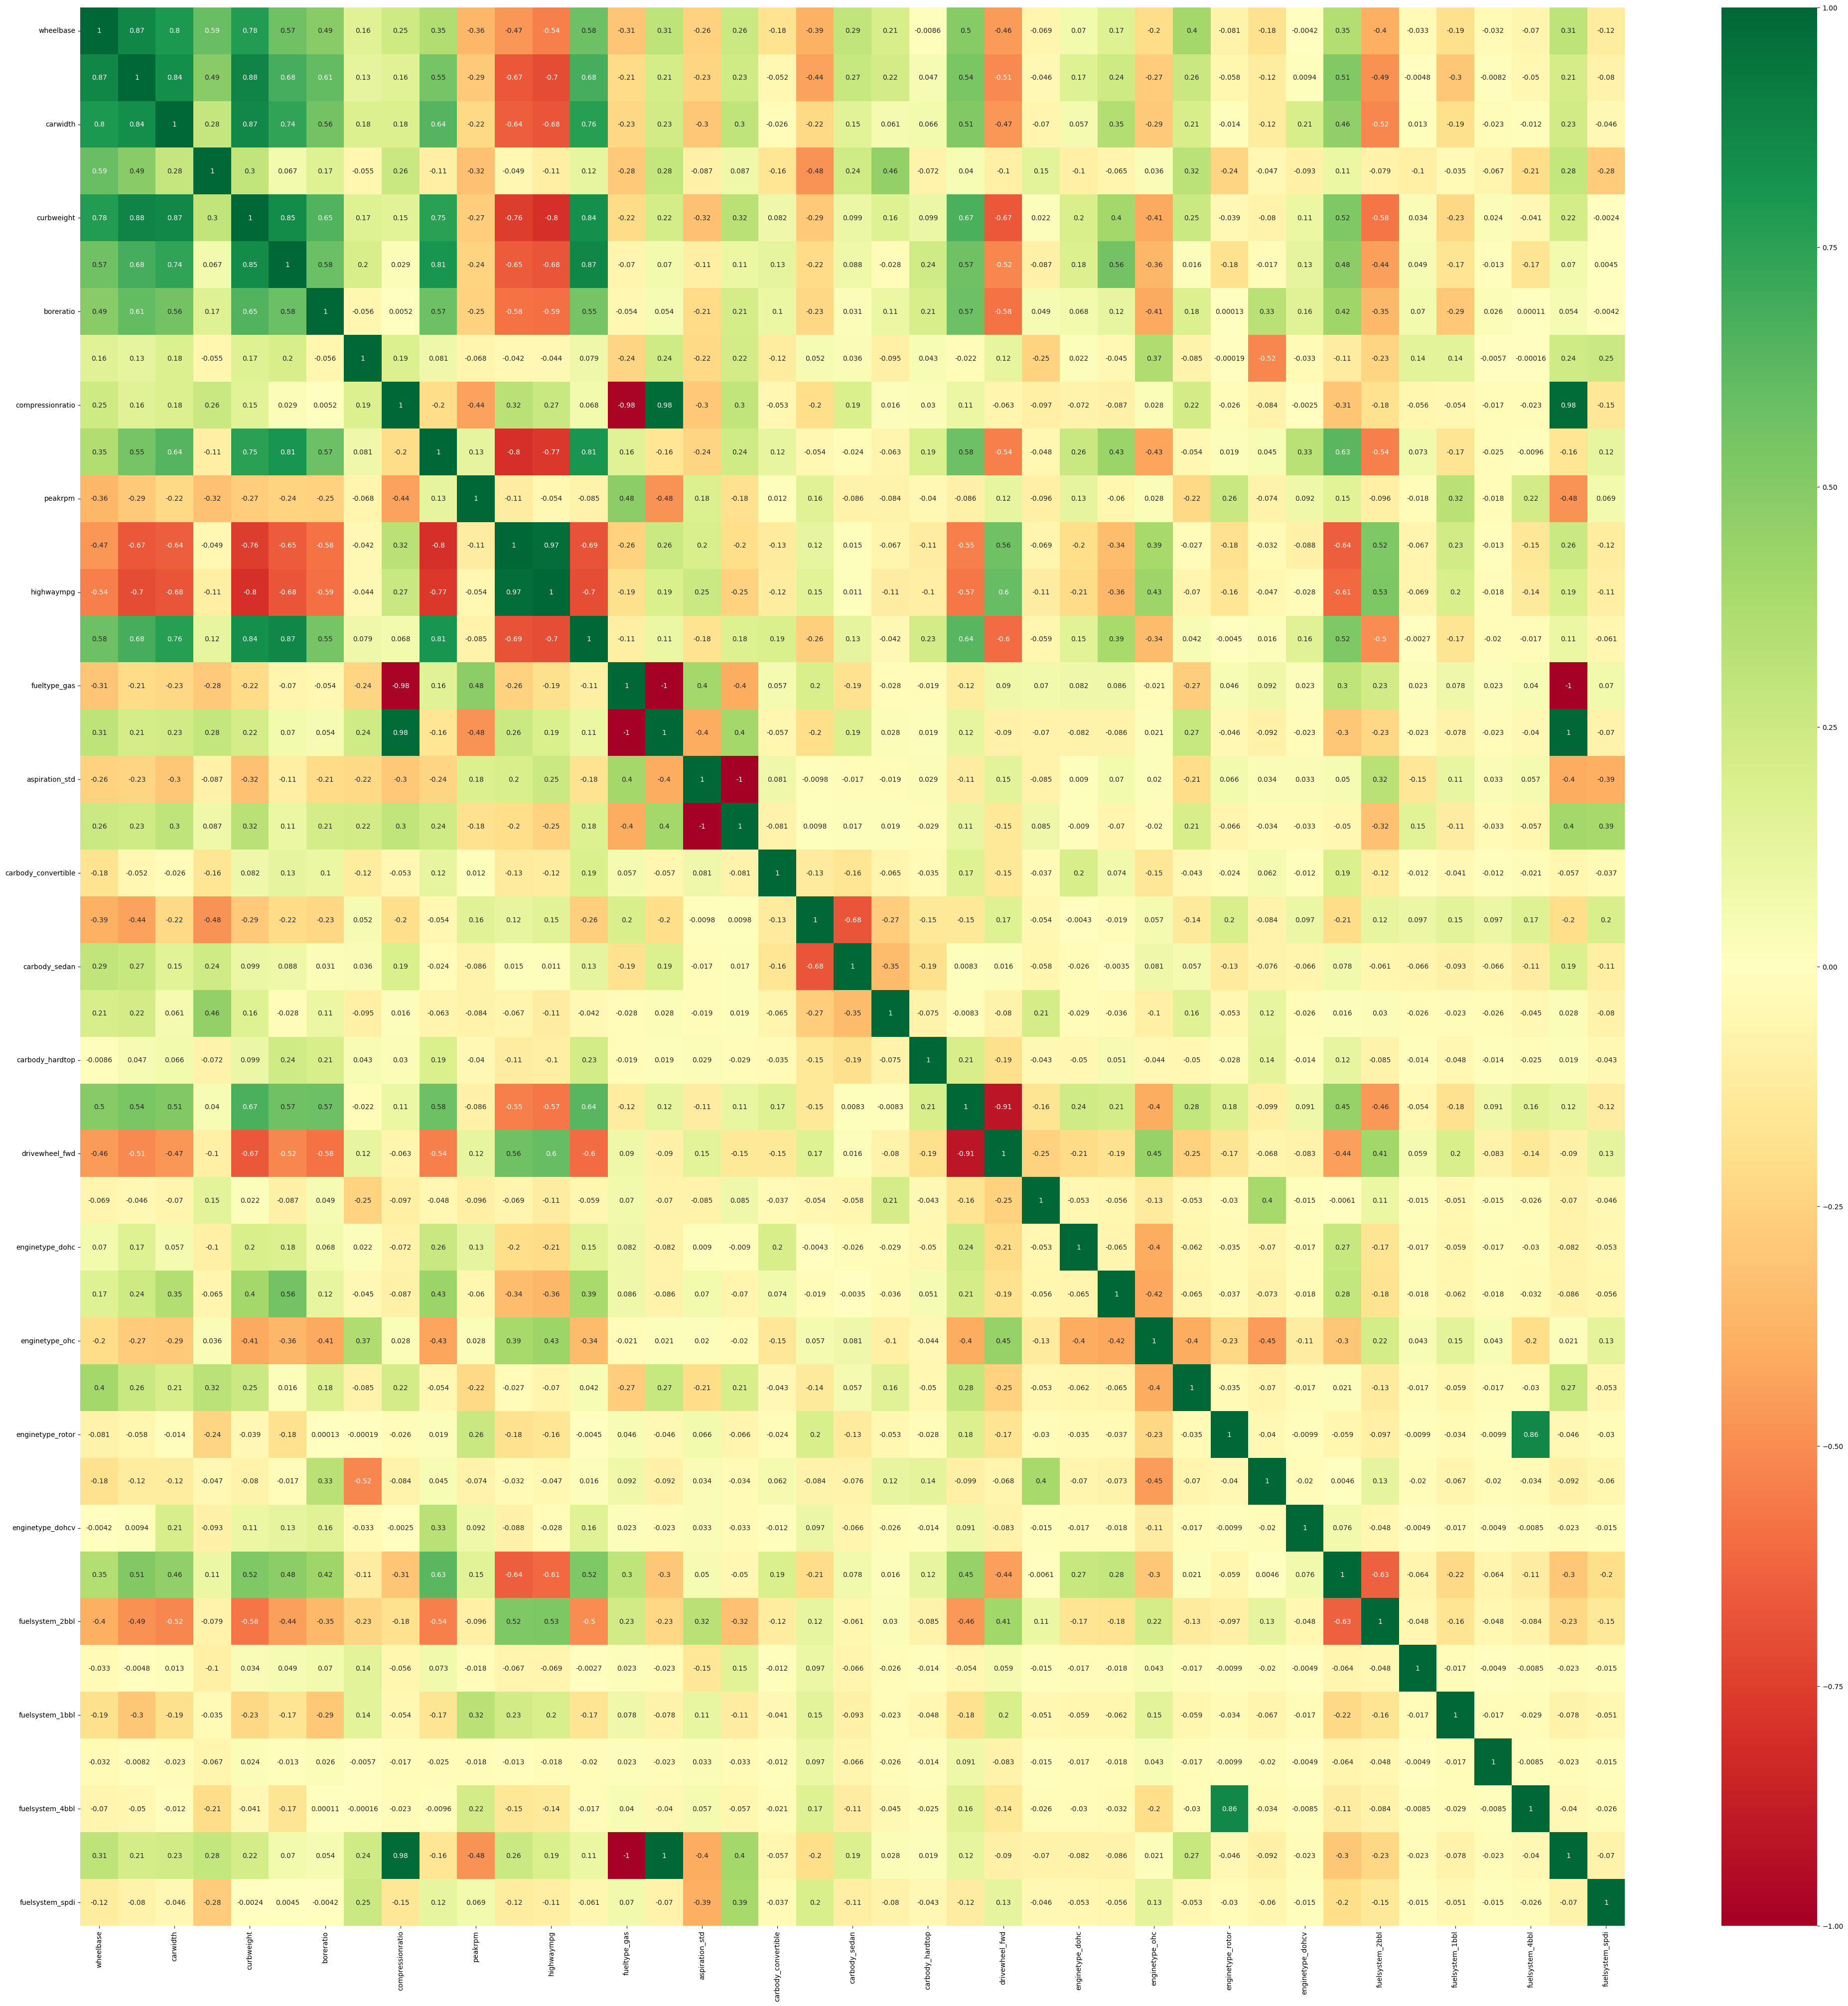

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(50, 50)
plt.show()

In [8]:
corr_matrix = df.corr(numeric_only=True)

In [9]:
to_delete_columns = []
corr_pairs = corr_matrix.unstack()

for column1, column2, corr in corr_pairs.reset_index().values.tolist():
    if column1 == column2 or column1 in to_delete_columns or column1 == 'price':
        continue
    
    if corr > 0.7 or corr <-0.7:
        to_delete_columns.append(column1)
            
print(to_delete_columns)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'fueltype_gas', 'fueltype_diesel', 'aspiration_std', 'aspiration_turbo', 'drivewheel_rwd', 'drivewheel_fwd', 'enginetype_rotor', 'fuelsystem_4bbl', 'fuelsystem_idi']


In [10]:
df = df.drop(columns=to_delete_columns)
df.head()

,doornumber,enginelocation,carheight,cylindernumber,boreratio,stroke,peakrpm,price,carbody_convertible,carbody_hatchback,...,enginetype_ohc,enginetype_l,enginetype_ohcf,enginetype_dohcv,fuelsystem_mpfi,fuelsystem_2bbl,fuelsystem_mfi,fuelsystem_1bbl,fuelsystem_spfi,fuelsystem_spdi
0,1,-1,48.8,4,3.47,2.68,5000,13495.0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,-1,48.8,4,3.47,2.68,5000,16500.0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,-1,52.4,6,2.68,3.47,5000,16500.0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-1,-1,54.3,4,3.19,3.40,5500,13950.0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,-1,-1,54.3,5,3.19,3.40,5500,17450.0,0,0,...,1,0,0,0,1,0,0,0,0,0


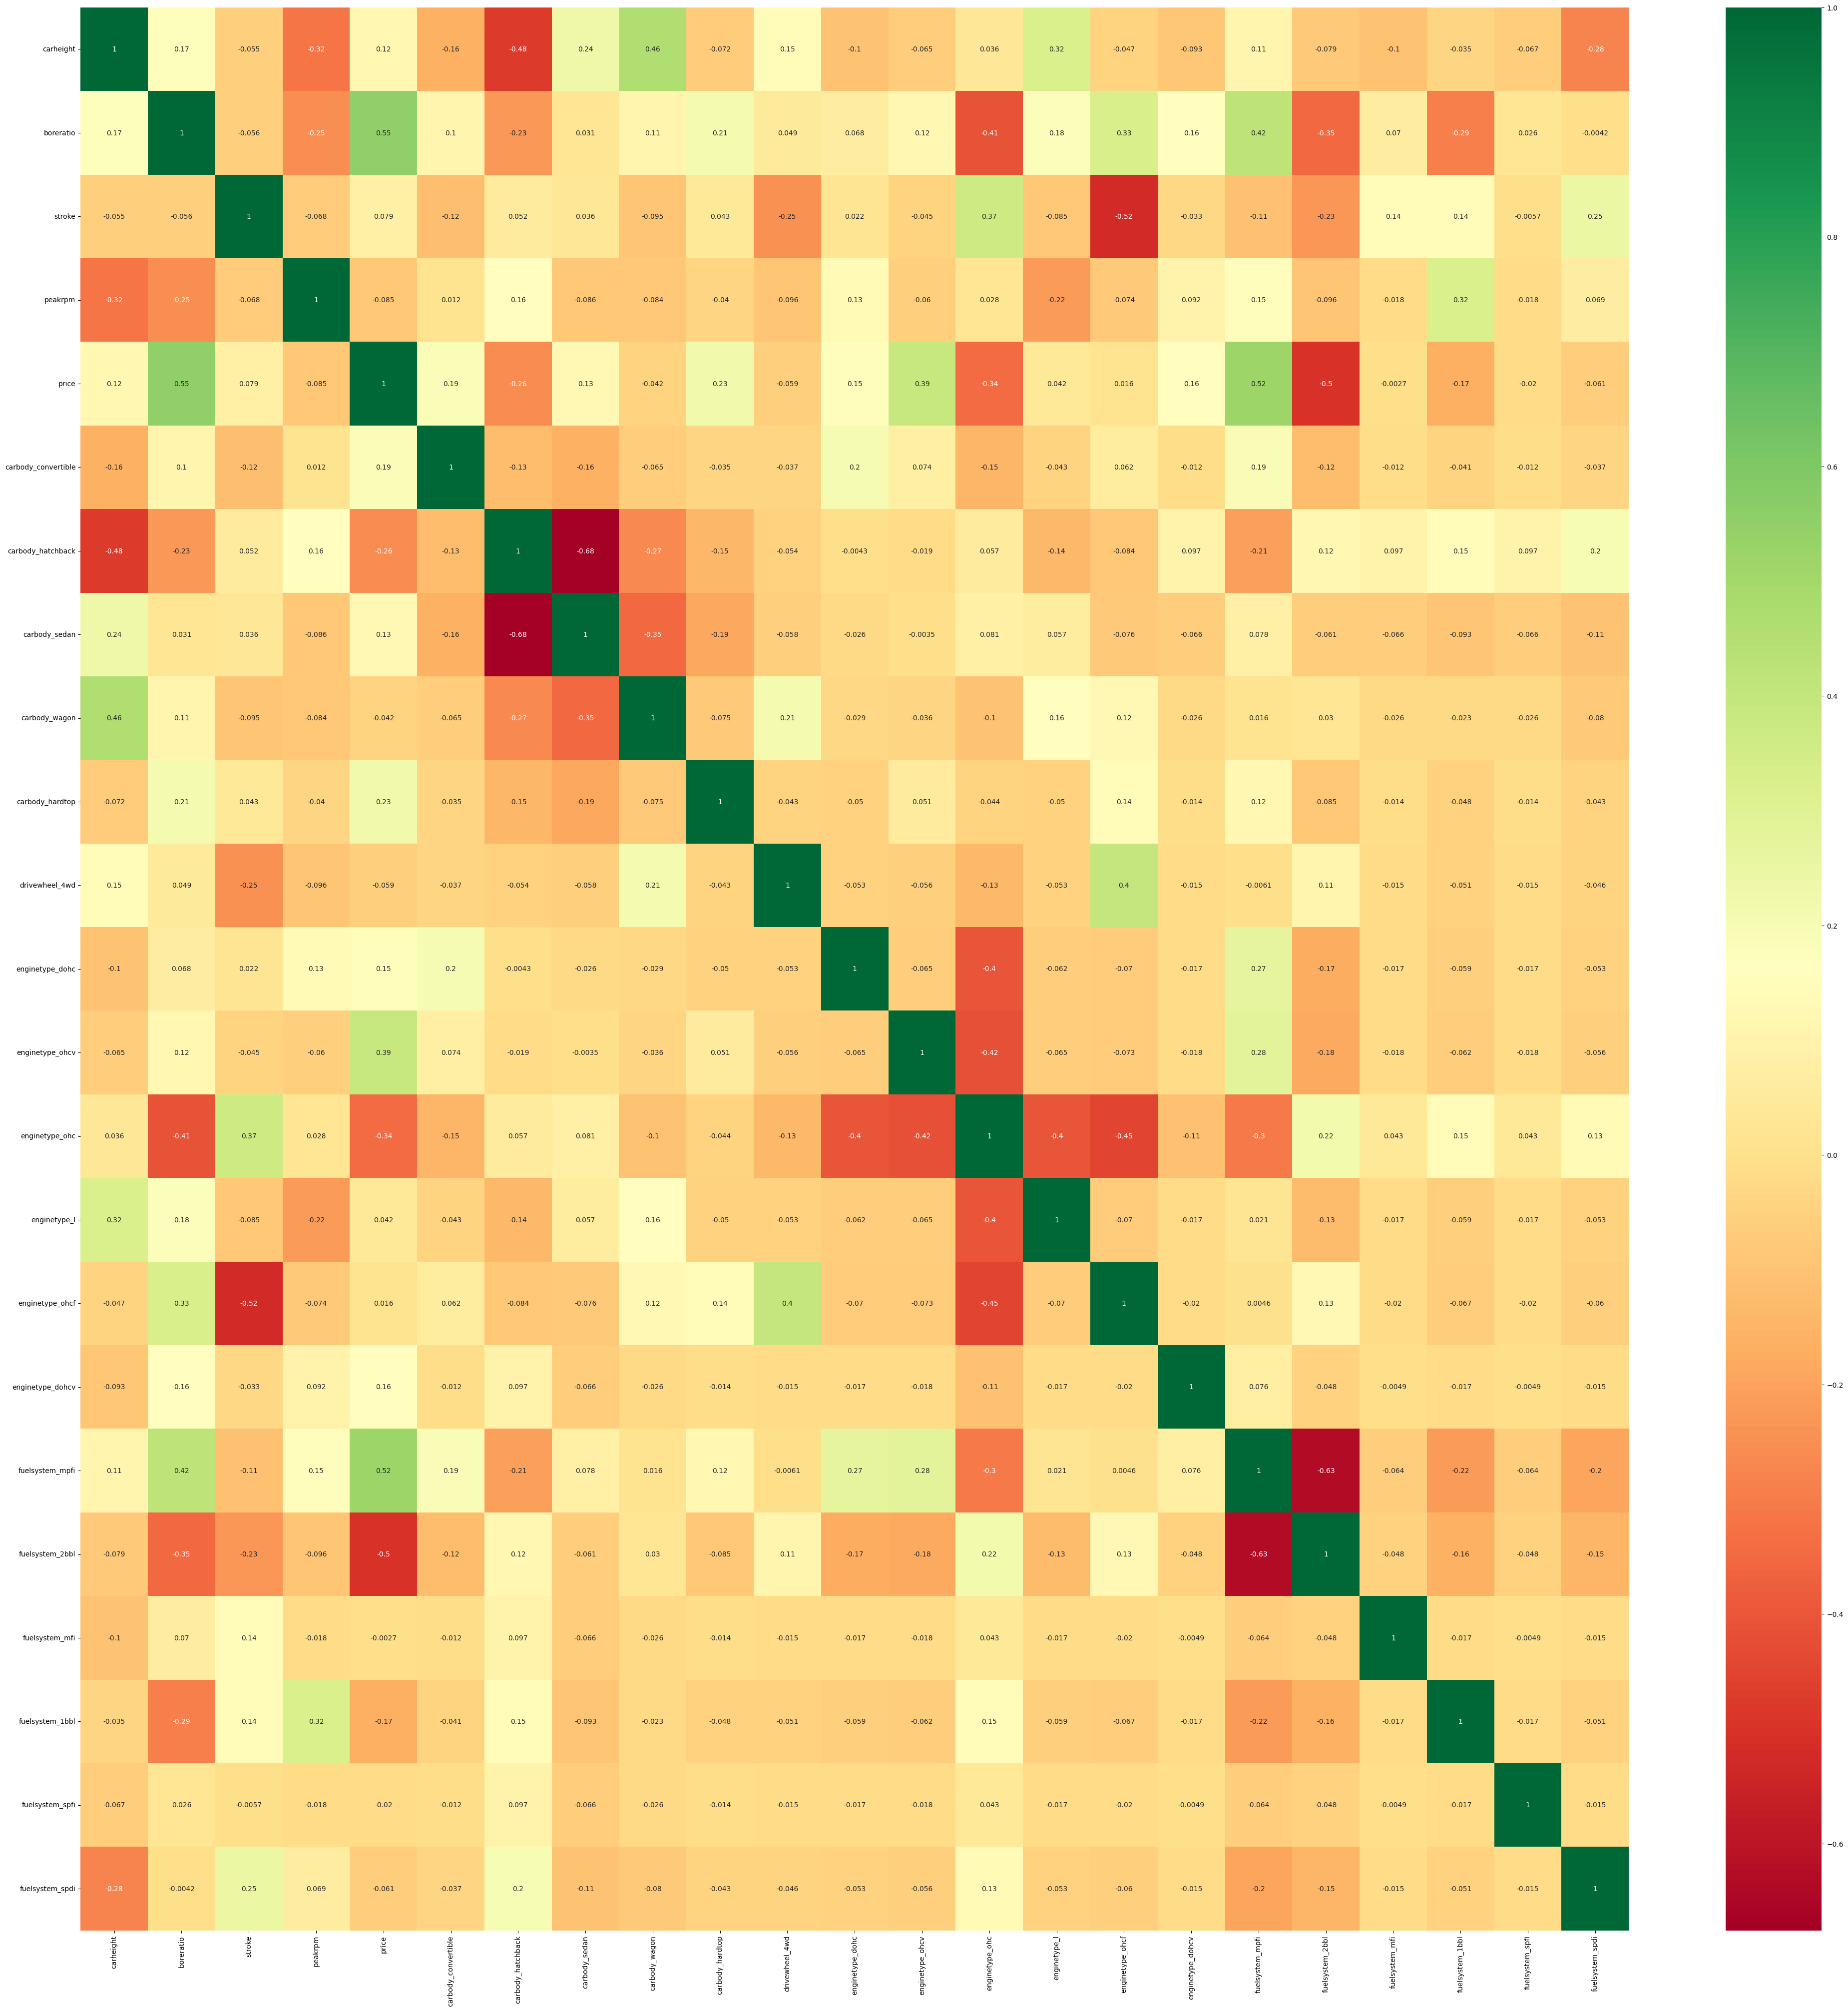

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(50, 50)
plt.show()

# Реализация линейной регрессии

In [58]:
import abc
from math import ceil

import numpy as np
from sklearn.base import RegressorMixin
from sklearn.linear_model._base import LinearModel
from sklearn.utils.validation import (
    check_random_state
)


class LinearRegression(RegressorMixin, LinearModel, abc.ABC):
    def __init__(self, alpha = 1, max_iter = 1000, tol = 1e-6):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        
    def get_batch_from_X_y(self, X, y):
        return X, y

    def fit(self, X, y):
        X = np.c_[X, np.ones(X.shape[0])]
        
        # gradient_descent(X, y)
        coef = np.ones(X.shape[1])
        grad = np.inf
        n = 0
        while n < self.max_iter and np.linalg.norm(grad) > self.tol:
            X_subset, y_subset = self.get_batch_from_X_y(X, y)
            pred = X_subset @ coef
            grad = (2 / X_subset.shape[0]) * X_subset.T @ (pred - y_subset) + 2 * self.alpha * np.pad(coef[:-1], (0, 1))
            n += 1
            coef -= grad / n

        self.coef_ = coef[:-1]
        self.intercept_ = coef[-1]

        return self

class LinearRegressionMBGD(LinearRegression):
    def __init__(self, alpha = 1, batch_size = 0.1, max_iter = 1000, tol = 1e-6, random_state = 42):
        super().__init__(alpha, max_iter=max_iter, tol=tol)
        self.batch_size = batch_size
        self.random_state = random_state
        self.random_state_ = check_random_state(random_state)

    def get_batch_from_X_y(self, X, y):
        size = ceil(len(X) * self.batch_size)
        idx = self.random_state_.randint(len(X), size=size)
        return X[idx, :], y.iloc[idx]


class LinearRegressionSGD(LinearRegression):
    def __init__(self, alpha = 1, max_iter = 1000, tol = 1e-6, random_state = 42):
        super().__init__(alpha, max_iter=max_iter, tol=tol)
        self.random_state = random_state
        self.random_state_ = check_random_state(random_state)
        
    def get_batch_from_X_y(self, X, y):
        idx = self.random_state_.randint(len(X), size=1)
        return X[idx, :], y.iloc[idx]

# Recursive Feature Elimination

Используем RFE, чтобы выбрать наилучшее подмножетсво признаков. Для оценки качества параметров будем использовать референсную модель линейной регрессии с L2 регуляризатором - Ridge из sklearn.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

y = df['price']
X = df.drop(columns=['price'])

model = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])

rfe = RFE(
    model,
    importance_getter=lambda m: m.named_steps["ridge"].coef_
)
rfe.fit(X, y)

print("Оценка важности признаков (меньше - лучше):")
for rank, feature in sorted(zip(rfe.ranking_, X.columns)):
    print(rank, feature)

Оценка важности признаков (меньше - лучше):
1 boreratio
1 carbody_wagon
1 carheight
1 cylindernumber
1 enginelocation
1 enginetype_dohc
1 enginetype_dohcv
1 enginetype_l
1 enginetype_ohc
1 enginetype_ohcf
1 enginetype_ohcv
1 fuelsystem_2bbl
2 carbody_convertible
3 fuelsystem_1bbl
4 peakrpm
5 fuelsystem_mpfi
6 fuelsystem_spdi
7 drivewheel_4wd
8 carbody_hardtop
9 doornumber
10 carbody_hatchback
11 fuelsystem_spfi
12 stroke
13 fuelsystem_mfi
14 carbody_sedan


Благодаря RFE мы можем увидеть важность признаков. Уберем самые неважные.

In [14]:
to_delete_features = []
for rank, feature in sorted(zip(rfe.ranking_, X.columns)):
    if rank <= 3:
        continue
    to_delete_features.append(feature)

rfe_df = df.drop(columns=to_delete_features)
rfe_df.head()

,enginelocation,carheight,cylindernumber,boreratio,price,carbody_convertible,carbody_wagon,enginetype_dohc,enginetype_ohcv,enginetype_ohc,enginetype_l,enginetype_ohcf,enginetype_dohcv,fuelsystem_2bbl,fuelsystem_1bbl
0,-1,48.8,4,3.47,13495.0,1,0,1,0,0,0,0,0,0,0
1,-1,48.8,4,3.47,16500.0,1,0,1,0,0,0,0,0,0,0
2,-1,52.4,6,2.68,16500.0,0,0,0,1,0,0,0,0,0,0
3,-1,54.3,4,3.19,13950.0,0,0,0,0,1,0,0,0,0,0
4,-1,54.3,5,3.19,17450.0,0,0,0,0,1,0,0,0,0,0


# Обучение моделей

Обучим модели без кросс валидации

In [62]:
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y = rfe_df['price']
X = rfe_df.drop(columns=['price'])


def train_simple(regressor, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    model = Pipeline([("scaler", StandardScaler()), ("regressor", regressor)])
    model.fit(X_train, y_train)

    pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred)
    rmse_train = mean_squared_error(y_train, pred, squared=False)
    r2_train = r2_score(y_train, pred)

    pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred)
    rmse_test = mean_squared_error(y_test, pred, squared=False)
    r2_test = r2_score(y_test, pred)

    return [name, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test]

data = []
data.append(train_simple(Ridge(), "Ridge"))
data.append(train_simple(LinearRegression(alpha=0.0001, max_iter=10000), "Self-made градиентный спуск"))
data.append(train_simple(LinearRegressionMBGD(alpha=0.0001, max_iter=10000), "Self-made mini batch градиентный спуск"))
data.append(train_simple(LinearRegressionSGD(alpha=0.0001, max_iter=1000000), "Self-made стохастический градиентный спуск"))

pd.DataFrame(
    data,
    columns=["Regressor", "MSE train", "MSE test", "RMSE train", "RMSE test", "R2 train", "R2 test"]
)

,Regressor,MSE train,MSE test,RMSE train,RMSE test,R2 train,R2 test
0,Ridge,"9,986,998.93","18,108,464.90","3,160.22","4,255.40",0.83,0.77
1,Self-made градиентный спуск,"10,931,460.59","20,233,663.54","3,306.28","4,498.18",0.82,0.74
2,Self-made mini batch градиентный спуск,"10,475,011.02","18,100,000.41","3,236.51","4,254.41",0.82,0.77
3,Self-made стохастический градиентный спуск,"37,730,865.87","43,305,892.18","6,142.55","6,580.72",0.37,0.45


# Обучение моделей с кросс валидацией

Обучим модели используя кросс валидацию и подбор гиперпараметров

In [63]:
from sklearn.model_selection import GridSearchCV

y = rfe_df['price']
X = rfe_df.drop(columns=['price'])

pd.options.display.float_format = '{:,.2f}'.format

def train_and_dump(regressor, name, param_grid):
    model = Pipeline([("scaler", StandardScaler()), ("regressor", regressor)])
    param_grid = {f"regressor__{name}": val for name, val in param_grid.items()}
    grid_search = GridSearchCV(
        model,
        param_grid,
        scoring=["neg_mean_squared_error", "neg_root_mean_squared_error", "r2"],
        refit="neg_mean_squared_error",
        return_train_score=True
    )
    grid_search.fit(X, y)

    print(name)
    print(
        "Лучшие гиперпараметры:",
        {name : val for name, val in grid_search.best_params_.items()}
    )

    result = pd.DataFrame(grid_search.cv_results_).iloc[grid_search.best_index_]
    data = []
    indexies = []
    column_names = []
    for i in range(1, 6):
        column_names.append(f"Fold {i}")
    column_names.append("Mean")
    column_names.append("STD")
    
    for score_function, name in [
        ("neg_mean_squared_error", "MSE"),
        ("neg_root_mean_squared_error", "RMSE"),
        ("r2", "R2")
    ]:
        for run_type in ["train", "test"]:
            row = []
            for i in range(5):
                row.append(result[f"split{i}_{run_type}_{score_function}"])
            row.append(result[f"mean_{run_type}_{score_function}"])
            row.append(result[f"std_{run_type}_{score_function}"])
            data.append(row)
            indexies.append(f"{name} ({run_type})")
    
    return pd.DataFrame(
        data=data,
        index=indexies,
        columns=column_names
    )

In [68]:
train_and_dump(
    Ridge(), "Ridge",
    {"alpha": [i * 10 for i in range(1, 10)]}
)

Ridge
Лучшие гиперпараметры: {'regressor__alpha': 40}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),"-14,453,314.91","-9,591,106.62","-16,303,633.33","-16,865,375.67","-14,641,467.11","-14,370,979.53","2,564,538.57"
MSE (test),"-28,823,950.30","-44,162,102.89","-17,470,302.17","-26,262,783.86","-21,330,726.48","-27,609,973.14","9,159,732.80"
RMSE (train),"-3,801.75","-3,096.95","-4,037.78","-4,106.75","-3,826.42","-3,773.93",358.39
RMSE (test),"-5,368.79","-6,645.46","-4,179.75","-5,124.72","-4,618.52","-5,187.45",836.87
R2 (train),0.76,0.78,0.78,0.73,0.80,0.77,0.02
R2 (test),0.60,0.66,0.06,0.59,-0.19,0.35,0.34


In [64]:
train_and_dump(
    LinearRegression(), "Self-made градиентный спуск",
    {
        "alpha": [0.0001, 0.01, 1],
        "max_iter": [i * 1000 for i in range(8, 10)],
        "tol": [1e-4, 1e-5, 1e-6]
    }
)

Self-made градиентный спуск
Лучшие гиперпараметры: {'regressor__alpha': 1, 'regressor__max_iter': 8000, 'regressor__tol': 1e-06}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),"-20,123,496.77","-15,146,330.62","-23,629,967.36","-23,408,159.95","-22,845,474.79","-21,030,685.90","3,198,460.09"
MSE (test),"-40,127,190.11","-58,130,975.82","-13,564,652.35","-32,152,019.67","-15,580,831.82","-31,911,133.95","16,482,195.65"
RMSE (train),"-4,485.92","-3,891.83","-4,861.07","-4,838.20","-4,779.69","-4,571.34",365.40
RMSE (test),"-6,334.60","-7,624.37","-3,683.02","-5,670.28","-3,947.26","-5,451.90","1,479.14"
R2 (train),0.67,0.66,0.68,0.63,0.69,0.67,0.02
R2 (test),0.45,0.55,0.27,0.50,0.13,0.38,0.15


In [65]:
train_and_dump(
    LinearRegressionMBGD(), "Self-made mini batch градиентный спуск",
    {
        "alpha": [0.0001, 0.01, 1],
        "max_iter": [i * 1000 for i in range(8, 10)],
        "tol": [1e-4, 1e-5, 1e-6]
    }
)

Self-made mini batch градиентный спуск
Лучшие гиперпараметры: {'regressor__alpha': 1, 'regressor__max_iter': 9000, 'regressor__tol': 0.0001}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),"-20,078,963.40","-15,126,850.37","-23,488,996.80","-23,255,723.78","-22,691,580.61","-20,928,422.99","3,145,200.10"
MSE (test),"-40,124,409.43","-57,947,529.84","-13,716,175.22","-32,050,625.78","-15,391,607.66","-31,846,069.59","16,427,424.44"
RMSE (train),"-4,480.96","-3,889.33","-4,846.54","-4,822.42","-4,763.57","-4,560.56",360.13
RMSE (test),"-6,334.38","-7,612.33","-3,703.54","-5,661.33","-3,923.21","-5,446.96","1,475.37"
R2 (train),0.67,0.66,0.68,0.63,0.70,0.67,0.02
R2 (test),0.45,0.55,0.26,0.50,0.14,0.38,0.15


In [67]:
train_and_dump(
    LinearRegressionSGD(), "Self-made стохастический градиентный спуск",
    {
        "alpha": [0.0001, 0.01, 1],
        "max_iter": [50000, 100000],
        "tol": [1e-4, 1e-5, 1e-6]
    }
)

Self-made стохастический градиентный спуск
Лучшие гиперпараметры: {'regressor__alpha': 1, 'regressor__max_iter': 100000, 'regressor__tol': 0.0001}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),"-20,217,399.95","-15,229,788.33","-24,037,782.22","-23,869,978.85","-23,236,209.29","-21,318,231.73","3,342,663.01"
MSE (test),"-40,135,594.21","-58,392,660.63","-13,008,709.15","-32,451,129.24","-15,139,244.41","-31,825,467.53","16,779,546.15"
RMSE (train),"-4,496.38","-3,902.54","-4,902.83","-4,885.69","-4,820.40","-4,601.57",379.23
RMSE (test),"-6,335.27","-7,641.51","-3,606.76","-5,696.59","-3,890.92","-5,434.21","1,514.88"
R2 (train),0.67,0.65,0.67,0.62,0.69,0.66,0.02
R2 (test),0.45,0.55,0.30,0.49,0.16,0.39,0.14


# Вывод

По предложенным в датасете параметрам можно с довольно высокой точностью предсказывать цену машины.

* Ridge оказался лучше, чем собственная реализация градиентного спуска. Вероятно, это связано с недостаточно хорошим подбором гиперпараметров
* Из всего многообразия предложенных параметров наиболее влияющими на цену машины оказались параметры, относящиеся к характеристикам двигателя, что хорошо соотносится с интуитивными соображениями